<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/DroughtPrediction80k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset100K/Data_COMBINED80k/201505-202309.csv")
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
0,0,201505,9.702,37.729,292.839,283.988,305.404,286.520,0.020244,0.000000,...,0.178913,0.161112,NaN,NaN,4611.15,3035.86,295.602,0.000002,-0.97038,-0.844767
1,1,201505,1.078,37.011,293.020,285.835,305.467,285.516,0.018373,0.000000,...,0.198134,0.185867,NaN,NaN,2984.00,1884.00,295.824,0.000004,-1.66772,-1.933380
2,2,201505,1.797,37.011,292.688,285.057,305.402,284.958,0.021141,0.000000,...,0.154558,0.134441,NaN,NaN,3240.96,2081.54,295.186,0.000007,-1.68398,-2.009140
3,3,201505,2.515,37.011,292.897,284.173,306.818,286.393,0.017408,0.000000,...,0.115420,0.086205,NaN,NaN,3462.39,2251.77,295.107,0.000010,-1.67913,-2.045660
4,4,201505,3.234,37.011,292.292,280.791,310.462,284.513,0.018756,0.000000,...,0.097784,0.088205,NaN,NaN,3261.57,2160.50,295.231,0.000012,-1.70453,-1.869160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510853,5053,202309,25.512,-34.136,288.416,282.802,300.051,282.891,0.088558,0.000000,...,0.166631,0.180785,-0.020458,0.000220,4887.59,2456.74,291.476,0.000009,1.46933,1.069890
510854,5054,202309,26.231,-34.136,288.627,281.224,302.752,282.159,0.082663,0.000000,...,0.144268,0.145911,-0.017434,-0.007050,4735.43,2394.70,292.203,0.000008,1.38760,0.771825
510855,5055,202309,26.949,-34.136,289.193,282.534,304.435,283.182,0.081773,0.000000,...,0.138911,0.145701,-0.015794,-0.009573,5556.77,2824.34,292.680,0.000008,1.12429,0.457465
510856,5056,202309,19.763,-34.855,287.069,279.898,294.821,281.649,0.094790,0.000000,...,0.187951,0.213317,0.024678,0.025565,5626.69,3325.72,289.515,NaN,2.93274,1.531950


In [4]:
dataset.describe()

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
count,510858.000000,510858.000000,510858.000000,510858.000000,510858.000000,510858.000000,510858.000000,510858.000000,510858.000000,5.108580e+05,...,509082.000000,509141.000000,463009.000000,463715.000000,510227.000000,510227.000000,510757.000000,5.106560e+05,510106.000000,510151.000000
mean,2528.500000,201910.485149,19.339257,6.067062,297.662543,288.696494,307.403321,283.479882,0.052162,5.230922e-05,...,0.149692,0.142511,-0.001507,-0.001424,3388.204197,2110.673078,298.517199,2.539975e-05,-0.642987,-0.761723
std,1460.120231,244.867373,15.103706,17.901254,5.786360,6.698585,5.740488,8.832256,0.086242,2.306448e-04,...,0.126877,0.113976,0.023196,0.022560,2341.148667,1400.573423,5.700012,4.111084e-05,1.343284,1.284938
min,0.000000,201505.000000,-16.888000,-47.072000,270.798000,256.978000,280.575000,258.515000,0.000016,0.000000e+00,...,0.020000,0.020012,-0.264652,-0.266774,-50.183400,104.070000,277.705000,0.000000e+00,-5.000000,-5.000000
25%,1264.000000,201706.000000,8.983000,-8.265000,294.366000,284.505000,303.502000,276.051000,0.000222,0.000000e+00,...,0.049894,0.055987,-0.008659,-0.007875,1124.140000,848.000000,295.476000,5.631315e-08,-1.492790,-1.604770
50%,2528.500000,201907.000000,20.482000,8.983000,298.106000,290.283000,307.094000,284.061000,0.006220,0.000000e+00,...,0.103452,0.095937,-0.000938,-0.000881,2748.670000,1652.060000,298.979000,3.656525e-06,-0.668492,-0.846058
75%,3793.000000,202108.000000,30.543000,20.482000,301.333000,293.926000,311.682000,291.617000,0.074072,9.942030e-07,...,0.215695,0.203343,0.004741,0.004813,5435.215000,3219.535000,302.199000,3.515037e-05,0.250921,0.072079
max,5057.000000,202309.000000,51.384000,37.729000,313.949000,303.901000,323.184000,300.500000,1.128000,8.780000e-03,...,0.678366,0.676076,0.220063,0.260856,8815.020000,6340.930000,313.910000,3.890030e-04,5.000000,5.000000


In [5]:
dataset.isna().sum()

Unnamed: 0                             0
Month                                  0
Lat                                    0
Lon                                    0
temperature_2m                         0
temperature_2m_min                     0
temperature_2m_max                     0
dewpoint_temperature_2m                0
total_precipitation_sum                0
total_precipitation_min                0
total_precipitation_max                0
u_component_of_wind_10m                0
v_component_of_wind_10m                0
surface_net_solar_radiation_sum        0
total_evaporation_sum                  0
soil_moisture_am                    1776
soil_moisture_pm                    1717
soil_moisture_am_anomaly           47849
soil_moisture_pm_anomaly           47143
NDVI                                 631
EVI                                  631
next_month_tempreature               101
next_month_precipitation             202
spei01                               752
spei03          

In [6]:
dataset = dataset.drop(["soil_moisture_am_anomaly", "soil_moisture_pm_anomaly"], axis = 1)

In [7]:
dataset.dropna(subset=['spei01', 'spei03', 'next_month_precipitation', 'next_month_tempreature', 'EVI', 'NDVI', "soil_moisture_am", "soil_moisture_pm"], inplace=True)

In [8]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
dtype: int64

In [9]:
len(dataset)

508760

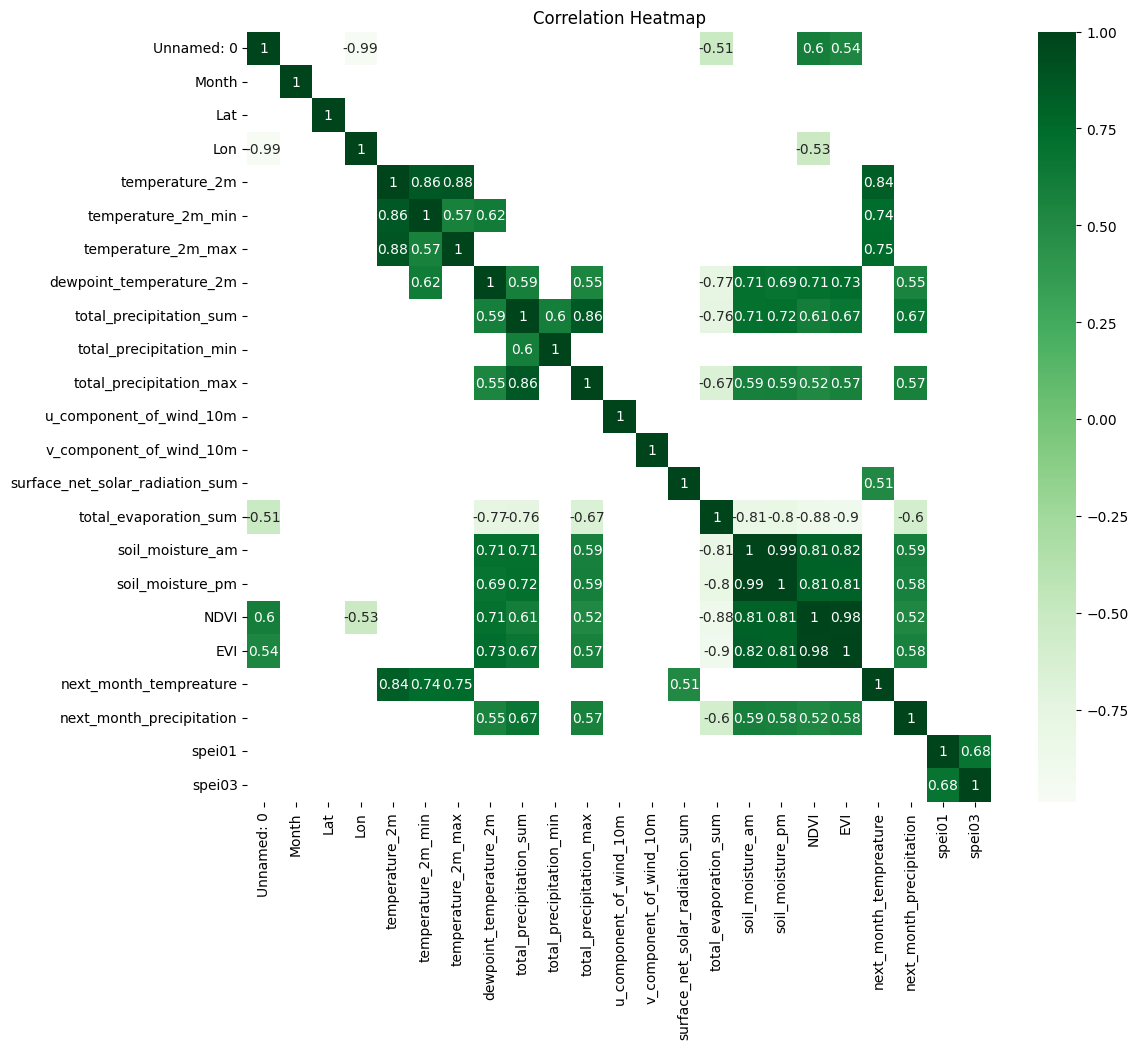

In [ ]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()

- Longitude is moderately inversely correlated to NDVI
- Average temperature this month is strongly correlated to average temperature the following month
- Average temperature is strongly correlated to minimum and maximum temperature
- Dewpoint temperature is strongly correlated with NDVI, EVI, and soil moisture. It is moderately correlated with next month precipitation, past month precipitation, and past month temperature
- Total past month precipitation is strongly correlated with soil moisture, maximum precipitation, and dewpoint temperature
- NDVI and EVI are strongly correlated with soil moisture


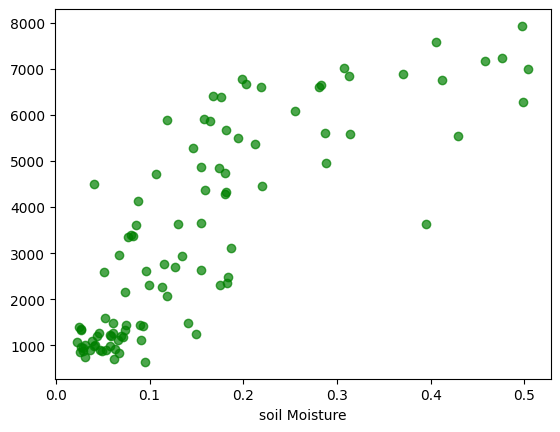

In [ ]:
import random

sample_df = dataset.sample(n=100, axis='rows')

soil_moisture = sample_df["soil_moisture_am"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(soil_moisture, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("soil Moisture")

plt.show()

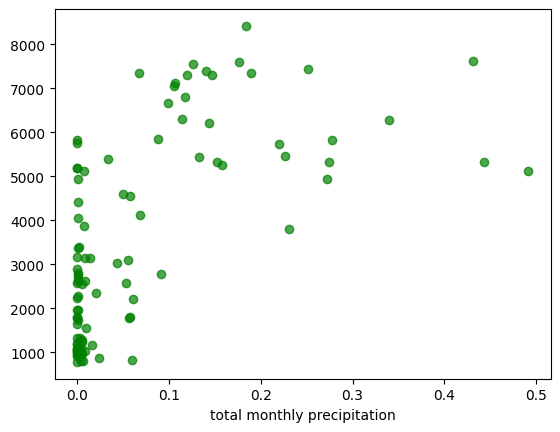

In [ ]:
sample_df = dataset.sample(n=100, axis='rows')

total_precipitation_sample = sample_df["total_precipitation_sum"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(total_precipitation_sample, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("total monthly precipitation")

plt.show()

<ipython-input-11-d8f96d5f0668>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


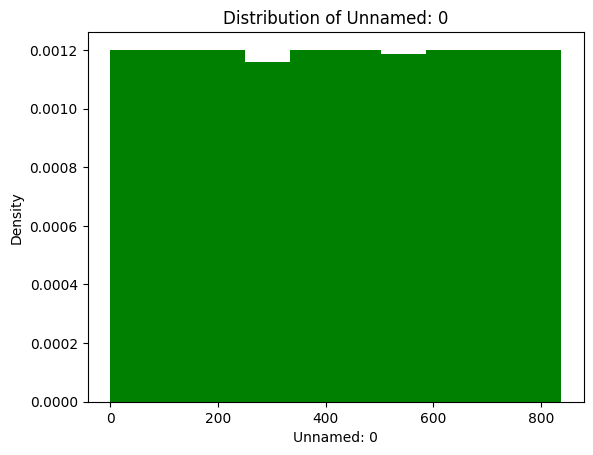

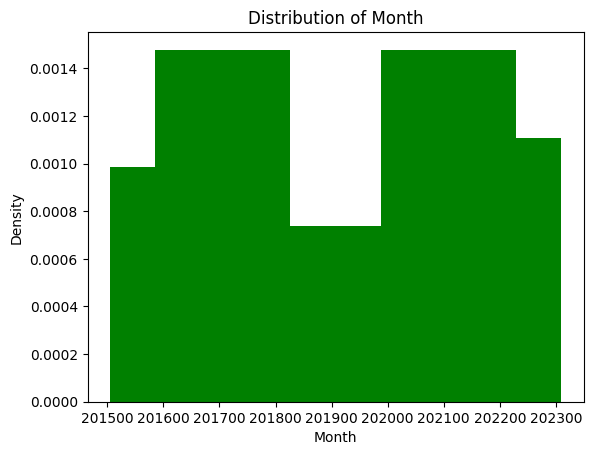

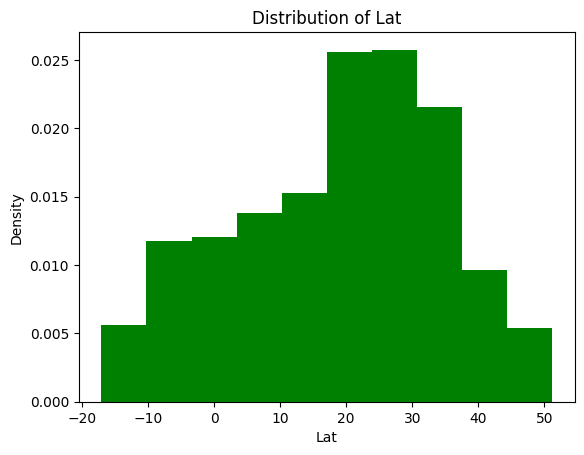

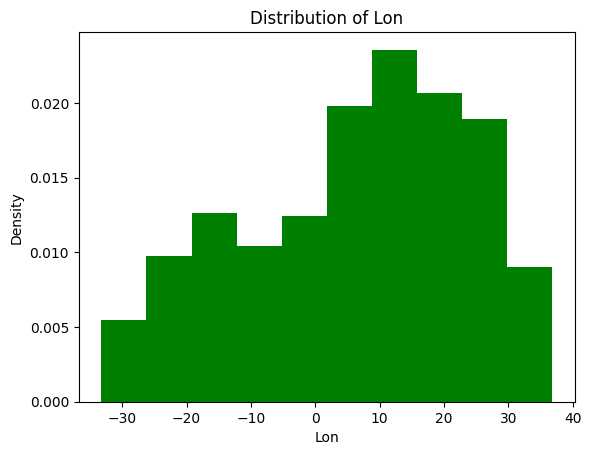

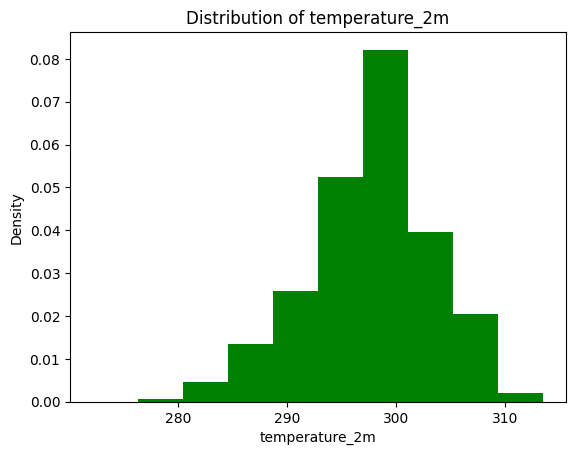

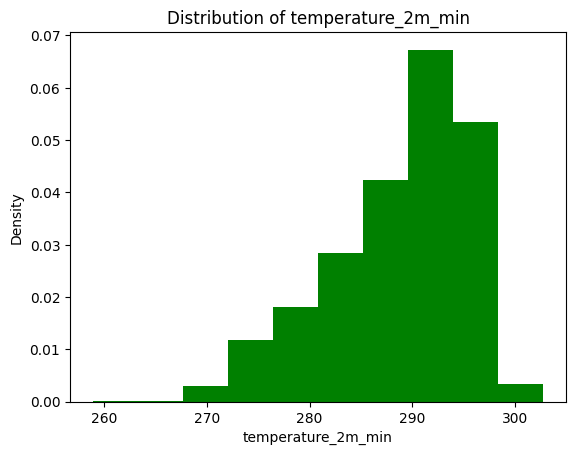

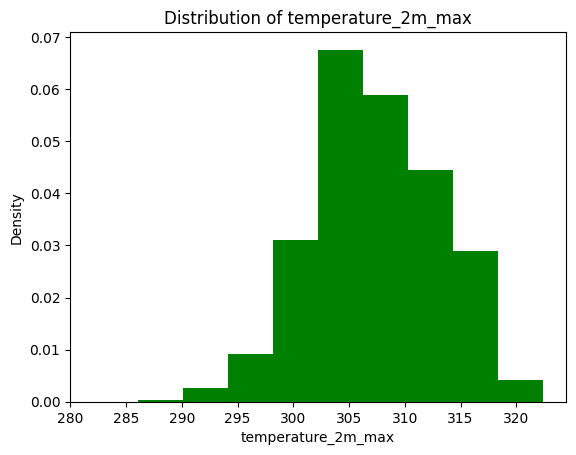

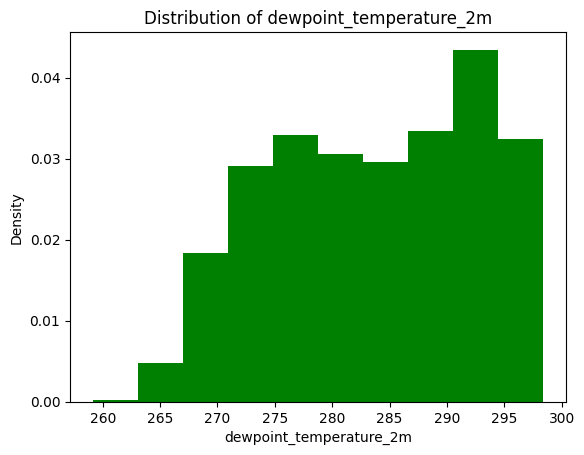

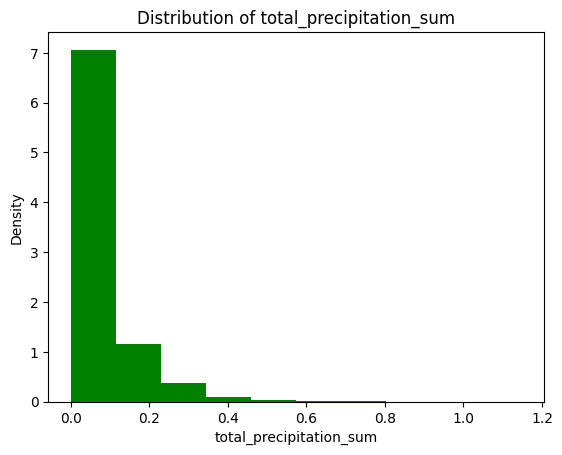

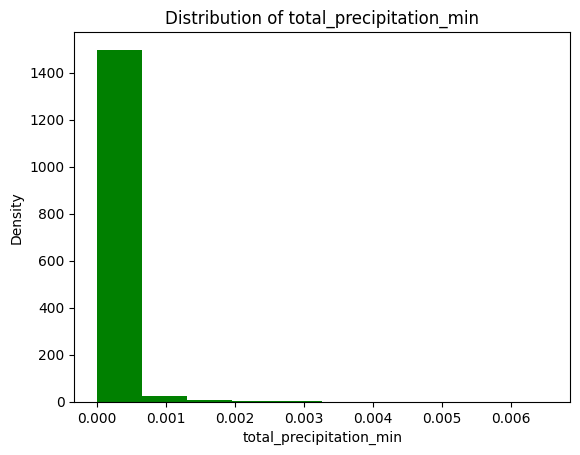

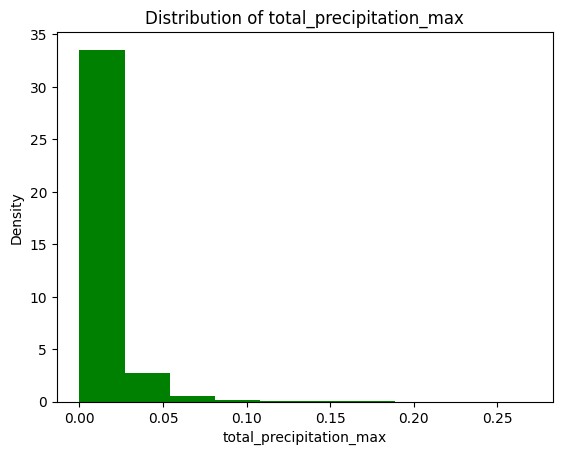

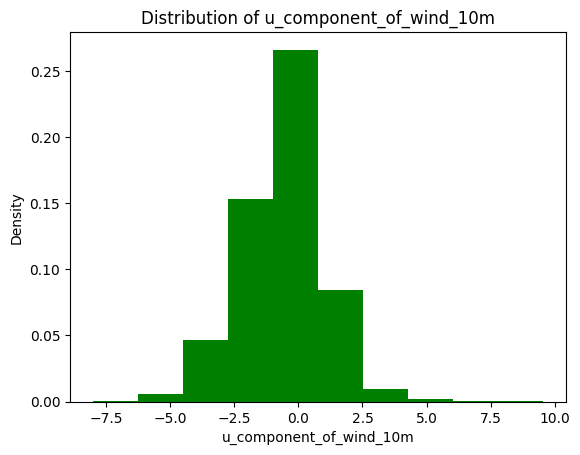

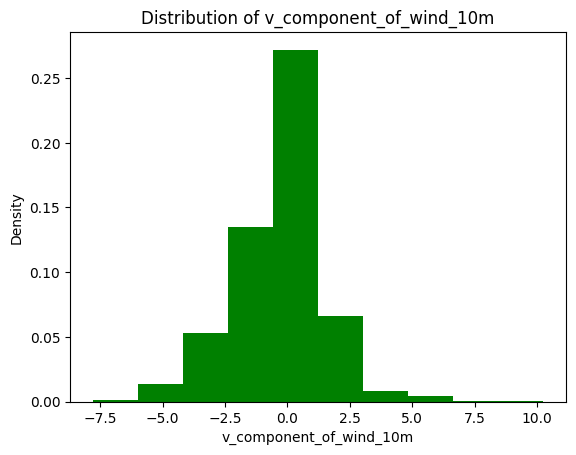

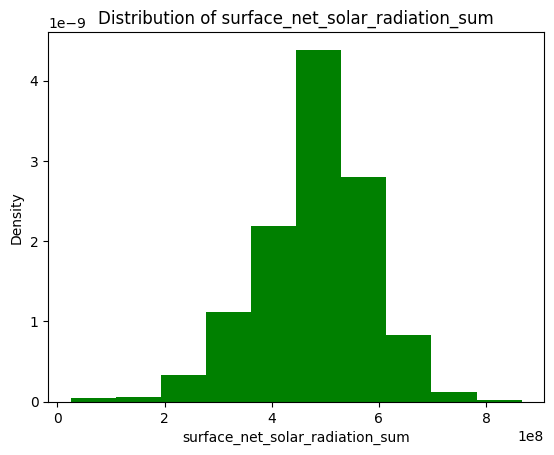

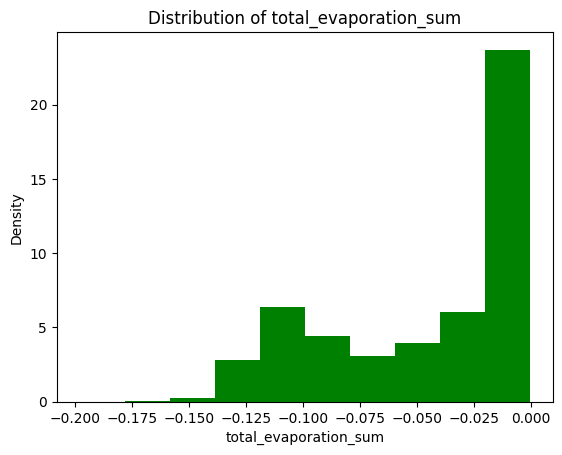

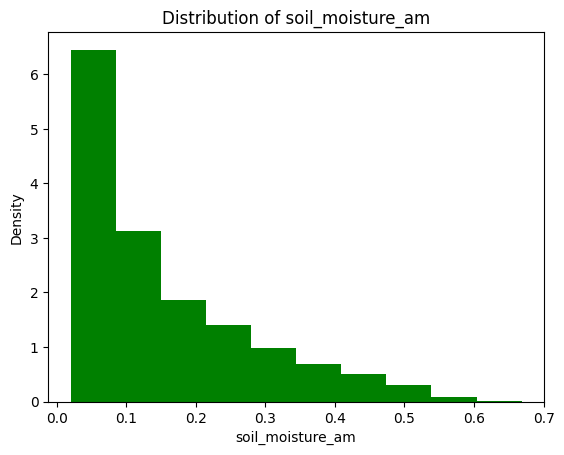

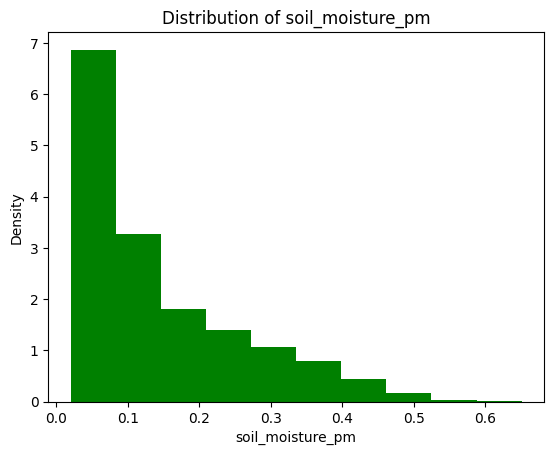

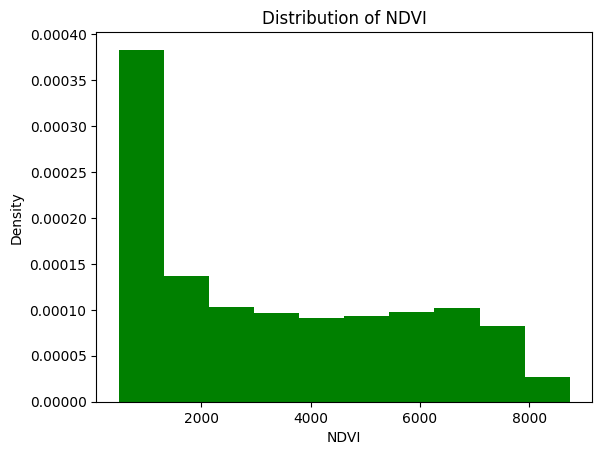

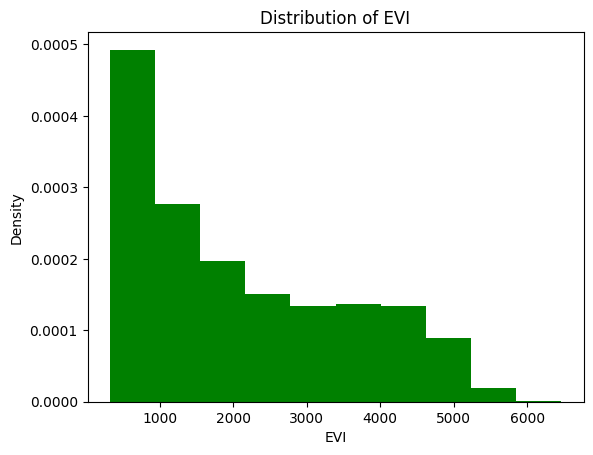

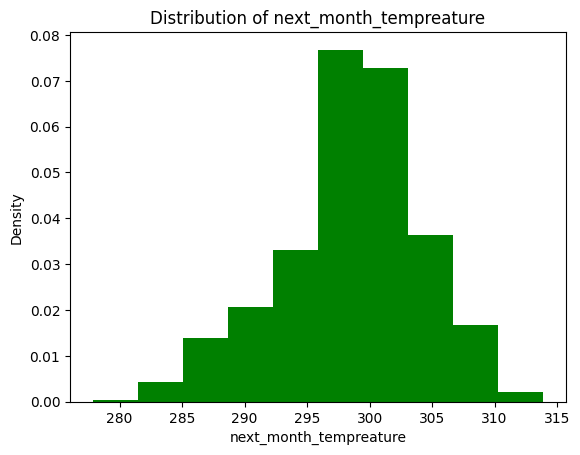

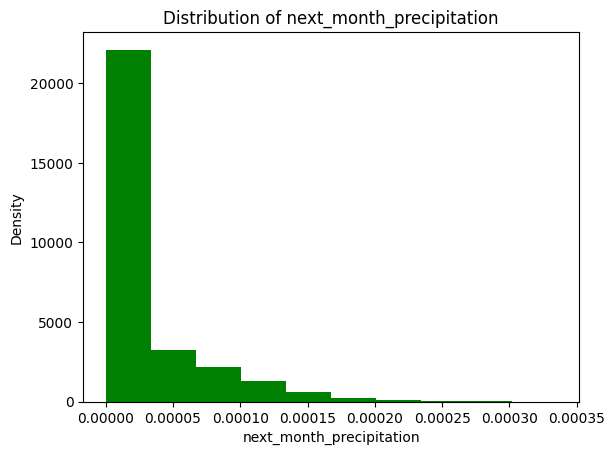

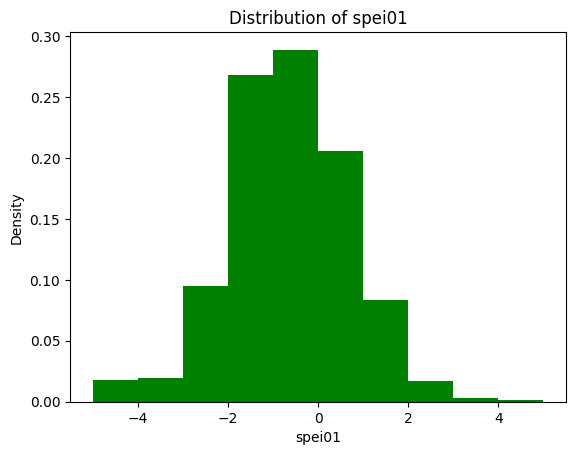

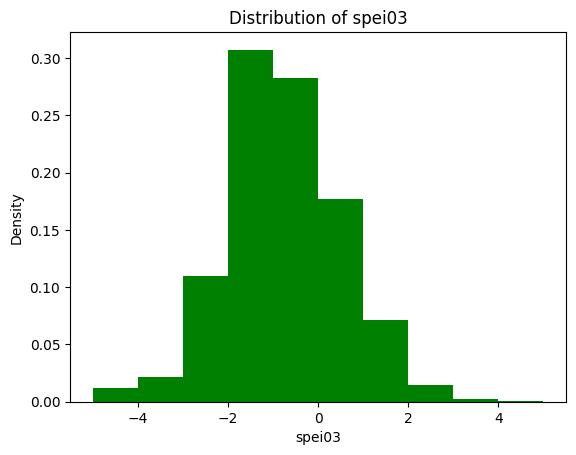

In [ ]:
column_list = dataset.columns.values.tolist()

for col_name in column_list:
    plt.figure()
    plt.hist(dataset[col_name], density = True, color = 'green')
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

In [10]:
dataset['datetime'] = pd.to_datetime(dataset['Month'], format='%Y%m')

In [11]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month2'] = dataset['datetime'].dt.month

In [12]:
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_pm,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2
0,0,201505,9.702,37.729,292.839,283.988,305.404,286.520,0.020244,0.0,...,0.161112,4611.15,3035.86,295.602,0.000002,-0.97038,-0.844767,2015-05-01,2015,5
1,1,201505,1.078,37.011,293.020,285.835,305.467,285.516,0.018373,0.0,...,0.185867,2984.00,1884.00,295.824,0.000004,-1.66772,-1.933380,2015-05-01,2015,5
2,2,201505,1.797,37.011,292.688,285.057,305.402,284.958,0.021141,0.0,...,0.134441,3240.96,2081.54,295.186,0.000007,-1.68398,-2.009140,2015-05-01,2015,5
3,3,201505,2.515,37.011,292.897,284.173,306.818,286.393,0.017408,0.0,...,0.086205,3462.39,2251.77,295.107,0.000010,-1.67913,-2.045660,2015-05-01,2015,5
4,4,201505,3.234,37.011,292.292,280.791,310.462,284.513,0.018756,0.0,...,0.088205,3261.57,2160.50,295.231,0.000012,-1.70453,-1.869160,2015-05-01,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510851,5051,202309,24.075,-34.136,286.589,280.196,299.435,281.939,0.113603,0.0,...,0.308624,5752.63,2934.15,290.662,0.000012,1.36558,0.832591,2023-09-01,2023,9
510852,5052,202309,24.794,-34.136,287.841,281.930,301.169,282.571,0.095630,0.0,...,0.208410,5490.80,2768.01,291.103,0.000010,1.43531,1.129540,2023-09-01,2023,9
510853,5053,202309,25.512,-34.136,288.416,282.802,300.051,282.891,0.088558,0.0,...,0.180785,4887.59,2456.74,291.476,0.000009,1.46933,1.069890,2023-09-01,2023,9
510854,5054,202309,26.231,-34.136,288.627,281.224,302.752,282.159,0.082663,0.0,...,0.145911,4735.43,2394.70,292.203,0.000008,1.38760,0.771825,2023-09-01,2023,9


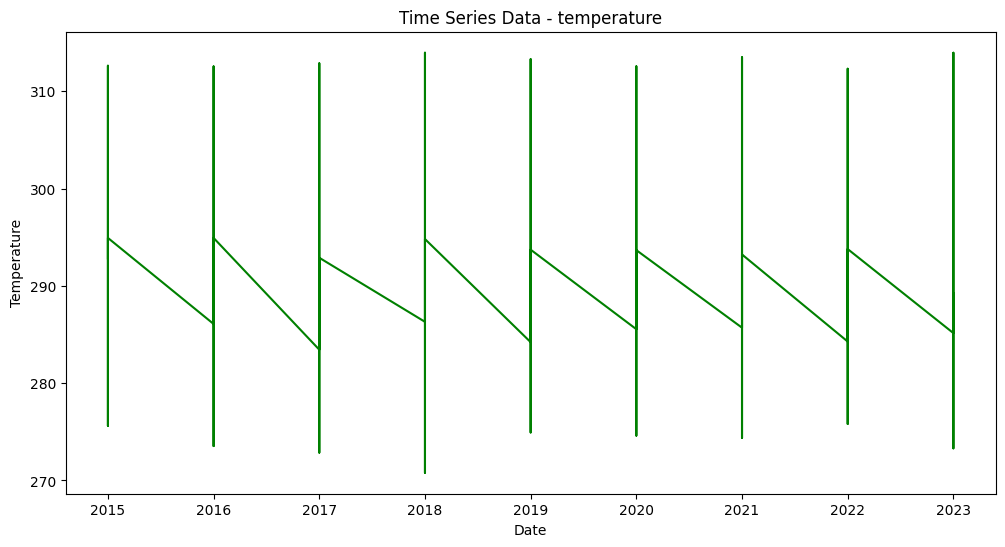

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['year'], dataset['temperature_2m'], color = 'green')
plt.title('Time Series Data - temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
# how to agregate this for yearly sums?

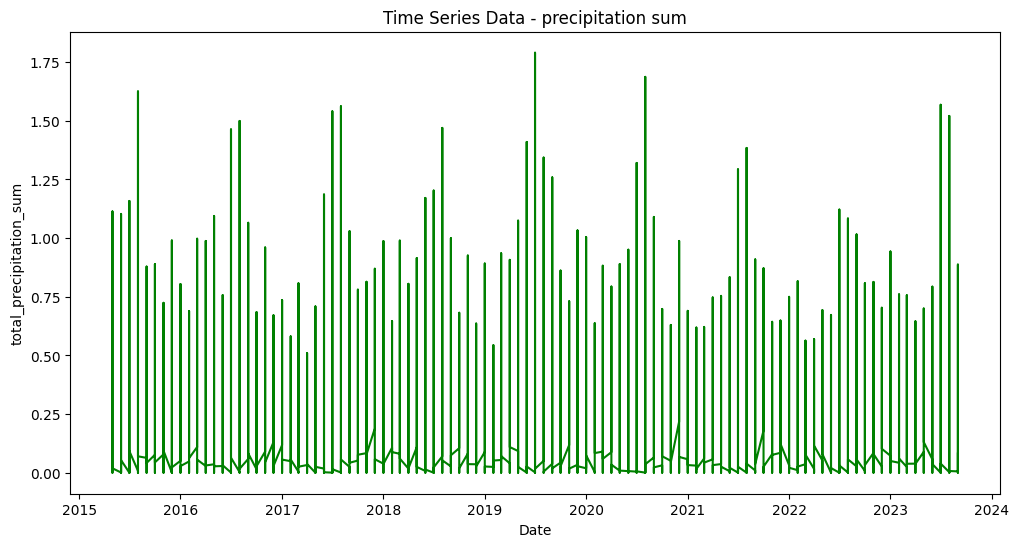

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation sum')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
# make a map graph of average SPEI in Africa, Max SPEI, min SPEI, or SPEI variability

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2'],
      dtype='object')

In [13]:
dataset.sort_values(by=['Lat', 'Lon', 'Month'], inplace=True)

In [14]:
dataset['next_month_soil_moisture_am'] = dataset.groupby(['Lat', 'Lon'])['soil_moisture_am'].shift(-1)

In [15]:
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
1681,1681,201505,-16.888,16.170,297.396,292.901,307.508,291.535,0.000122,0.0,...,1326.5,983.5,303.440,2.111670e-06,-1.091100,-1.169530,2015-05-01,2015,5,0.160279
6739,1681,201506,-16.888,16.170,298.619,293.731,308.847,292.779,0.000019,0.0,...,1245.5,939.0,301.683,2.035970e-06,-1.825760,-2.002790,2015-06-01,2015,6,0.162948
11797,1681,201507,-16.888,16.170,299.903,296.753,304.154,295.437,0.006244,0.0,...,1603.5,1098.0,302.647,7.866530e-06,-2.141580,-2.153830,2015-07-01,2015,7,0.294684
16855,1681,201508,-16.888,16.170,300.922,297.687,304.888,297.288,0.095634,0.0,...,2024.5,1502.0,304.100,4.509100e-05,0.865500,-0.615956,2015-08-01,2015,8,0.297026
21913,1681,201509,-16.888,16.170,301.628,297.800,306.486,297.503,0.042196,0.0,...,2136.0,1629.0,304.898,8.611070e-07,-0.182051,-0.363410,2015-09-01,2015,9,0.271236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487789,2221,202305,51.384,11.858,301.614,297.134,306.453,296.269,0.003843,0.0,...,1980.5,1376.5,305.934,1.660940e-07,0.319006,0.616254,2023-05-01,2023,5,0.145444
492847,2221,202306,51.384,11.858,302.202,298.714,307.682,293.991,0.000165,0.0,...,1824.5,1307.0,305.712,2.902700e-08,0.589778,0.953662,2023-06-01,2023,6,0.145729
497905,2221,202307,51.384,11.858,302.481,298.656,308.919,291.652,0.000031,0.0,...,1655.5,1180.0,303.911,2.969240e-06,1.419960,0.838565,2023-07-01,2023,7,0.148105
502963,2221,202308,51.384,11.858,301.761,298.042,308.729,292.487,0.000029,0.0,...,1648.0,1199.0,304.143,3.134930e-07,0.521591,0.867580,2023-08-01,2023,8,0.149612


In [16]:
dataset["soil_moisture_am"]

1681      0.157247
6739      0.160279
11797     0.162948
16855     0.294684
21913     0.297026
            ...   
487789    0.145565
492847    0.145444
497905    0.145729
502963    0.148105
508021    0.149612
Name: soil_moisture_am, Length: 508760, dtype: float64

In [ ]:
dataset["next_month_soil_moisture_am"]

287      0.148753
1125     0.169415
1963     0.229645
2801     0.226260
3639     0.155879
           ...   
80835    0.147549
81673    0.146490
82511    0.148758
83349    0.151262
84187         NaN
Name: next_month_soil_moisture_am, Length: 84416, dtype: float64

In [17]:
dataset.isna().sum()

Unnamed: 0                            0
Month                                 0
Lat                                   0
Lon                                   0
temperature_2m                        0
temperature_2m_min                    0
temperature_2m_max                    0
dewpoint_temperature_2m               0
total_precipitation_sum               0
total_precipitation_min               0
total_precipitation_max               0
u_component_of_wind_10m               0
v_component_of_wind_10m               0
surface_net_solar_radiation_sum       0
total_evaporation_sum                 0
soil_moisture_am                      0
soil_moisture_pm                      0
NDVI                                  0
EVI                                   0
next_month_tempreature                0
next_month_precipitation              0
spei01                                0
spei03                                0
datetime                              0
year                                  0


In [18]:
dataset.dropna(subset=["next_month_soil_moisture_am"], inplace=True)

In [19]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
next_month_soil_moisture_am        0
d

In [20]:
#save processed dataframe to csv
dataset.to_csv('/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_80km.csv')

In [22]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_80km.csv")

In [23]:
processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,1681,1681,201505,-16.888,16.170,297.396,292.901,307.508,291.535,0.000122,...,1326.5,983.5,303.440,2.111670e-06,-1.091100,-1.169530,2015-05-01,2015,5,0.160279
1,6739,1681,201506,-16.888,16.170,298.619,293.731,308.847,292.779,0.000019,...,1245.5,939.0,301.683,2.035970e-06,-1.825760,-2.002790,2015-06-01,2015,6,0.162948
2,11797,1681,201507,-16.888,16.170,299.903,296.753,304.154,295.437,0.006244,...,1603.5,1098.0,302.647,7.866530e-06,-2.141580,-2.153830,2015-07-01,2015,7,0.294684
3,16855,1681,201508,-16.888,16.170,300.922,297.687,304.888,297.288,0.095634,...,2024.5,1502.0,304.100,4.509100e-05,0.865500,-0.615956,2015-08-01,2015,8,0.297026
4,21913,1681,201509,-16.888,16.170,301.628,297.800,306.486,297.503,0.042196,...,2136.0,1629.0,304.898,8.611070e-07,-0.182051,-0.363410,2015-09-01,2015,9,0.271236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503716,482731,2221,202304,51.384,11.858,300.347,296.843,305.015,294.945,0.003884,...,1971.0,1448.0,303.929,8.648930e-07,1.442610,0.345155,2023-04-01,2023,4,0.145565
503717,487789,2221,202305,51.384,11.858,301.614,297.134,306.453,296.269,0.003843,...,1980.5,1376.5,305.934,1.660940e-07,0.319006,0.616254,2023-05-01,2023,5,0.145444
503718,492847,2221,202306,51.384,11.858,302.202,298.714,307.682,293.991,0.000165,...,1824.5,1307.0,305.712,2.902700e-08,0.589778,0.953662,2023-06-01,2023,6,0.145729
503719,497905,2221,202307,51.384,11.858,302.481,298.656,308.919,291.652,0.000031,...,1655.5,1180.0,303.911,2.969240e-06,1.419960,0.838565,2023-07-01,2023,7,0.148105


In [ ]:
sample_processed_dataset = processed_dataset.iloc[:20000]

In [ ]:
sample_processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lon,Lat,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,13364,13364,201505,18.191,-34.361,288.773,282.525,294.960,285.571,0.046455,...,4844.43,2107.76,286.640,0.000029,-0.718496,-1.175710,2015-05-01,2015,5,0.285645
1,26760,13364,201506,18.191,-34.361,286.225,281.939,292.722,283.269,0.098863,...,5288.64,2253.58,287.052,0.000044,0.374049,-0.571277,2015-06-01,2015,6,0.309184
2,40156,13364,201507,18.191,-34.361,285.454,279.618,294.975,281.569,0.131433,...,5324.45,2443.61,287.182,0.000060,0.464176,-0.011315,2015-07-01,2015,7,0.269735
3,53552,13364,201508,18.191,-34.361,286.573,281.093,292.649,283.534,0.053647,...,5182.45,2388.77,288.475,0.000012,-1.149490,-0.142480,2015-08-01,2015,8,0.224512
4,66948,13364,201509,18.191,-34.361,287.536,282.000,296.194,283.477,0.045606,...,5094.24,2362.84,290.093,0.000022,-0.562886,-0.532203,2015-09-01,2015,9,0.138358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1285826,13206,202304,28.971,-31.216,289.172,277.420,301.348,283.622,0.048057,...,6065.20,3605.70,287.224,0.000017,-1.010550,0.011015,2023-04-01,2023,4,0.258616
19996,1299222,13206,202305,28.971,-31.216,285.553,274.647,300.058,281.351,0.102591,...,5634.72,2902.33,283.725,0.000018,2.010090,0.748854,2023-05-01,2023,5,0.278848
19997,1312618,13206,202306,28.971,-31.216,283.269,273.700,296.413,277.043,0.014038,...,4955.27,2466.52,284.522,0.000008,1.069360,1.270870,2023-06-01,2023,6,0.261563
19998,1326014,13206,202307,28.971,-31.216,282.957,272.720,298.360,275.391,0.021873,...,4345.82,2121.73,284.795,0.000024,0.351708,1.699190,2023-07-01,2023,7,0.195381


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_sm = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
y_sm = processed_dataset['next_month_soil_moisture_am']

In [ ]:
# 5. Split data into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# 6. Initialize and train the Random Forest regressor
rf_regressor_sm = RandomForestRegressor(n_estimators=100, random_state=42, verbose = 2)
rf_regressor_sm.fit(X_train_sm, y_train_sm)

# 7. Predict on the test set
y_pred_sm = rf_regressor_sm.predict(X_test_sm)

# 8. Evaluate the model
mse = mean_squared_error(y_test_sm, y_pred_sm)
print(f"Soil Moisture Prediction Mean Squared Error: {mse}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 21.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.5s


Mean Squared Error: 0.0003010407172210646


In [ ]:
# 4. Split data into features (X) and target (y)
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
y = processed_dataset['spei01']

In [ ]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose = 2)
rf_regressor.fit(X_train, y_train)

# 7. Predict on the test set
y_pred = rf_regressor.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 9. Use the model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = rf_regressor.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

Mean Squared Error: 0.8529379769767581


SPEI Mean Squared Error: 0.1450289768172908

In [ ]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
    # ... add other hyperparameters as needed
}

less_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30]
    # ... add other hyperparameters as needed
}

# 6. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=less_parameters,
                           cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

# 7. Perform grid search
grid_search.fit(X_train, y_train)

#save results into a dataframe to be graphed later
training_results_df = pd.DataFrame(grid_search.cv_results_)

# 8. Get best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_parameters}")
# 9. Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# 10. Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model for SPEI: {mse}")

# 11. Use the best model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = best_model.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

NameError: ignored

In [ ]:
#Saving the model with joblib
import joblib

filename = '/content/drive/MyDrive/DroughtCastAI/Models/Random Forest/SPEI_11/8.sav'
joblib.dump(best_model, filename)

In [ ]:
#retrieving the model from file
loaded_model = joblib.load(filename)

# evaluate model
y_predict = loaded_model.predict(X_test)

mse_loaded = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

In [25]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import rbf_kernel

In [26]:
! python -m pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 MB 16.3 MB/s eta 0:00:00


In [27]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
#X = sample_processed_dataset[['Lat', 'Lon']]
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_80km.csv")
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]

y = processed_dataset['spei01']
gamma=0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler = StandardScaler()
# TODO: Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled=X_train
#X_test_scaled=X_test
# Create the SVR model
# TODO: Choose and set the kernel type (e.g., 'linear', 'poly', 'rbf', 'sigmoid')
svr_model = SVR(kernel='rbf',  gamma=gamma, verbose=True, )
#svr_model = SVR(kernel=rbf_kernel, gamma=gamma, verbose=True, )

# Train the model using the training sets
svr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
# TODO: Print out the mean squared error and the R-squared value to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: ', mse)
print('R-squared value: ', r2)

[LibSVM]

In [ ]:
from sklearn import svm
#X_train, X_test, y_train, y_test

